<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/dnn/imdb_mlp_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP applied to IMDB movie reviews (binary sentiment analysis) <a class="anchor" id="imdb-keras-mlp"></a>

We use the IMDB movie review dataset, where the task is to classify the sentiment of the review as positive or negative. We use the preprocessed version of the dataset from
https://www.tensorflow.org/datasets

In [0]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio
from IPython import display
import sklearn
from time import time

In [2]:
# Tensorflow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras

print("tf version {}".format(tf.__version__))
if tf.test.is_gpu_available():
    print(tf.test.gpu_device_name())
else:
    print("TF cannot find GPU")

TensorFlow 2.x selected.
tf version 2.0.0-rc1
/device:GPU:0


In [3]:

import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews/subwords32k', with_info=True, as_supervised=True)
tokenizer = info.features['text'].encoder

print(info)
train_dataset, test_data = imdb['train'], imdb['test']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords32k/0.1.0. Subsequent calls will reuse this data.
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=32650>),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=32650>),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=32650>),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=32650>),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=32650>),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=32650>),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=32650>),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=32650>),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=32650>),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4
tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=0.1.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    urls=['http://ai.stanford.edu/~amaas/data/sentiment/'],
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(Non

In [4]:
prefix = train_dataset.batch(1).take(3) 
for data, label in prefix:
    print(data)
    print(tokenizer.decode(data.numpy()[0]))

tf.Tensor(
[[  224     4 18732   479     6 13398     2    12    31 21002    85  1357
     39  9613     6    30  7845    23     9    16     9    17   706    30
    641  1744    41   636  3127   714 32439  1184     6   509   196    40
    216  1028    10 10740  7025     2   695   146    45    18     4 26224
  10039     6  2151    13   106    34   261 20098    49 12899    20     1
   1902 18184 32494     3   131     4   313     2    38    18     4  7746
   1656 23996 27314 32426     5  3048  4314     3   164   106    34   817
      5  1199    10     1   201 10822     3   164 15376 23152 13191     2
  16346   120 13641  4513  1739     2 11114 18711 32515     2     5 29522
   3632    21 14554     5 12912     3    63   240    34     4  4780     2
     24    38    18     4   424 32433    11  1363    23     9    16     9
     17   119    15     8     1   380    13     8    50   493  1376    44
     30 12357 32509     3   426     1    95     6  1669     2  3550 12160
  32426     8   124 20300  

In [5]:
# Pad each doc within a minibatch to the same length
bs = 3 # batch size
train_data = train_dataset.padded_batch(bs, train_dataset.output_shapes)
for i, (data, label) in enumerate(train_data):
    print(data.shape) 
    if i > 4: break

(3, 727)
(3, 221)
(3, 248)
(3, 210)
(3, 298)
(3, 990)


In [6]:
#We can also use the version that ships with keras (this does not require an additional download)
imdb = keras.datasets.imdb

vocab_size = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)
print(np.shape(train_data)) # (25000)
print(train_data[0])
# [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941...]

word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


print(decode_review(train_data[0]))

17465344/17464789 [==============================] - 1s 0us/step
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345,

In [7]:
# Keras padding - every example in the dataset has fixed length

train_data = keras.preprocessing.sequence.pad_sequences(
    train_data, value=word_index["<PAD>"], padding='post', maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, value=word_index["<PAD>"], padding='post', maxlen=256)

print(train_data.shape)
print(train_data[0])

(25000, 256)
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   2

In [8]:

embed_size = 16
def make_model(embed_size):
  tf.random.set_seed(42)
  np.random.seed(42)
  model = keras.Sequential()
  model.add(keras.layers.Embedding(vocab_size, embed_size))
  model.add(keras.layers.GlobalAveragePooling1D())
  model.add(keras.layers.Dense(16, activation=tf.nn.relu))
  model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
  return model

model = make_model(embed_size)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [9]:
x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


15000/15000 [==============================] - 2s 154us/sample - loss: 0.6916 - acc: 0.5550 - val_loss: 0.6892 - val_acc: 0.5321
Epoch 2/50
15000/15000 [==============================] - 1s 52us/sample - loss: 0.6842 - acc: 0.6769 - val_loss: 0.6794 - val_acc: 0.6903
Epoch 3/50
15000/15000 [==============================] - 1s 56us/sample - loss: 0.6696 - acc: 0.6923 - val_loss: 0.6614 - val_acc: 0.7557
Epoch 4/50
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6448 - acc: 0.7680 - val_loss: 0.6338 - val_acc: 0.7715
Epoch 5/50
15000/15000 [==============================] - 1s 53us/sample - loss: 0.6094 - acc: 0.7972 - val_loss: 0.5970 - val_acc: 0.7929
Epoch 6/50
15000/15000 [==============================] - 1s 53us/sample - loss: 0.5659 - acc: 0.8165 - val_loss: 0.5549 - val_acc: 0.8085
Epoch 7/50
15000/15000 [==============================] - 1s 52us/sample - loss: 0.5182 - acc: 0.8362 - val_loss: 0.5125 - val_acc: 0.8242
Epoch 8/50
15000/15000 [=============

In [15]:
history_dict = history.history
print(history_dict.keys())

results = model.evaluate(test_data, test_labels)
print(results)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
25000/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

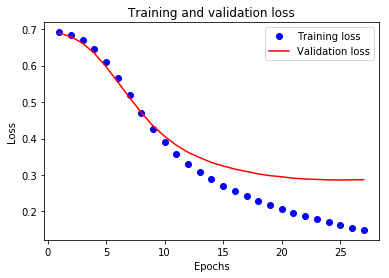

In [16]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
fig, ax = plt.subplots()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'r-', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#save_fig("imdb-loss.pdf")
plt.show()


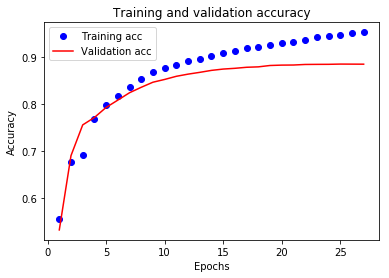

In [17]:
fig, ax = plt.subplots()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#save_fig("imdb-acc.pdf")
plt.show()


In [0]:
# Now turn on early stopping
# https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
callbacks = [PrintDot(),
             keras.callbacks.EarlyStopping(monitor='val_acc', patience=2),
             keras.callbacks.ModelCheckpoint(filepath='imdb_keras_best_model.ckpt',
                                             monitor='val_acc', save_best_only=True)]

INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


..

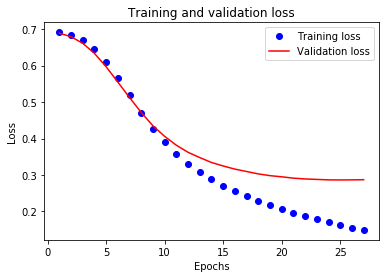

In [19]:
# Reset parameters to a new random state
model = make_model(embed_size)
history = model.fit(
    x_train, y_train, epochs=50, batch_size=512, 
    validation_data=(x_val, y_val), verbose=0, callbacks=callbacks)

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
fig, ax = plt.subplots()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'r-', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#save_fig("imdb-loss-early-stop.pdf")
plt.show()
